# Multivariate Analysis

Multivariate is the statistical study of data in which experiments are conducted on multiple variables in unit to understand the relationships among those measurements.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 1000
svg_renderer.height = 500
pio.renderers.default = "svg"
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Load data
df = pd.read_csv('./../../data/data.csv')

In [3]:
# Get the size of data
df.shape

(20632, 27)

In [4]:
# Get the columns of the data
df.columns

Index(['index', 'id', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'source_url', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean'],
      dtype='object')

In [5]:
# Select only relevant data concerning the target variable i.e.
# select data observations for which the state of project is either failed or successful
df = df[df['state'].isin(['failed', 'successful'])]

## Numerical Variables

### Distributions

Starting with the numerical vairables that are *goal*, *usd_pledged*, *backers_count*, *name_len*, and *blurb_len*.

As per our analysis in the previous section, the selected range of *goal* variable is from 0 to 1M because that's where most of the observations exist.

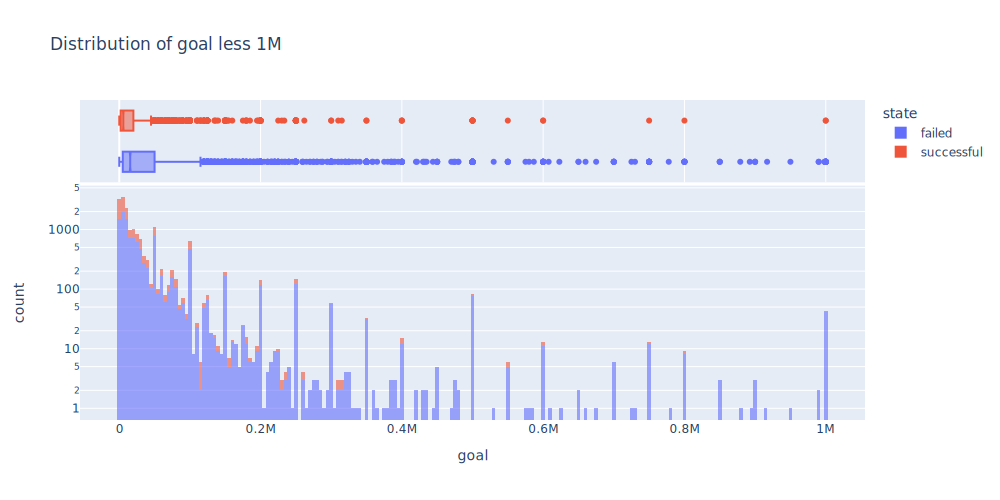

In [6]:
# Plot distribution of 'goal' variable for less than 1M
fig = px.histogram(df[df['goal']<=1000000], 
                    x='goal', 
                    color='state', 
                    log_y=True, 
                    marginal='box', 
                    opacity=0.6, 
                    title='Distribution of goal less 1M')
fig.show()

The distributions of failed goals and successful goals are mostly overlapping. But failed project goals have a fatter right tail than successful project goals. This signifies that the chance of failure of a crowdfunding project increases with increase in the fund goals.

The same range of 0 to 1M will be utilized for the pledged amount.

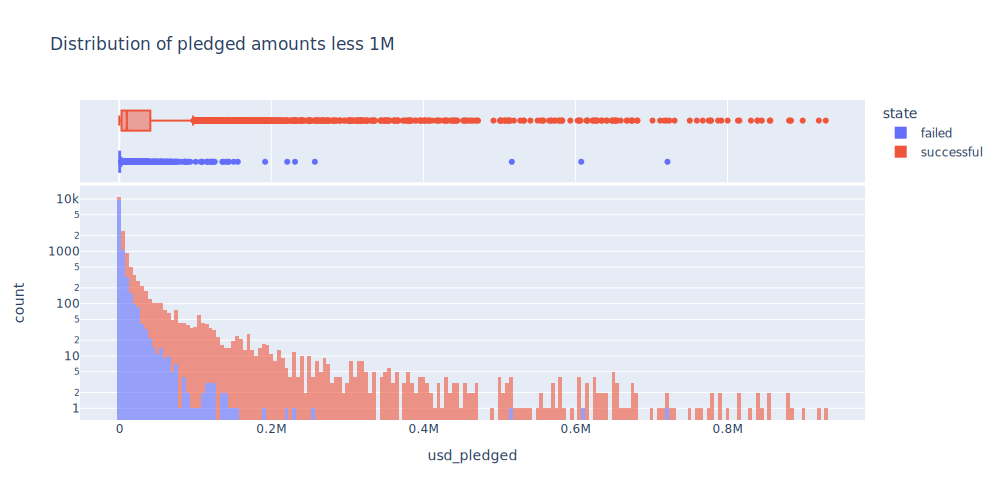

In [7]:
# Plot distribution of 'usd_pledged' variable for less than 1M
fig = px.histogram(df[df['usd_pledged']<=1000000], 
                    x='usd_pledged', 
                    color='state', 
                    log_y=True, 
                    marginal='box', 
                    opacity=0.6, 
                    title='Distribution of pledged amounts less 1M')
fig.show()

But the pledged amount tells a different story. From the above chart, it can be observed that successful projects have fatter tail than failed ones. This signifies that for successful projects, though the goals of projects were less, they were able to raise way beyond their goals, while the situation is the other way round for the failed projects. Since the distribution is quite wide for successful projects and failed projects, it can be said that successful projects are quite different from failed projects i.e. they may be distinctively separable.

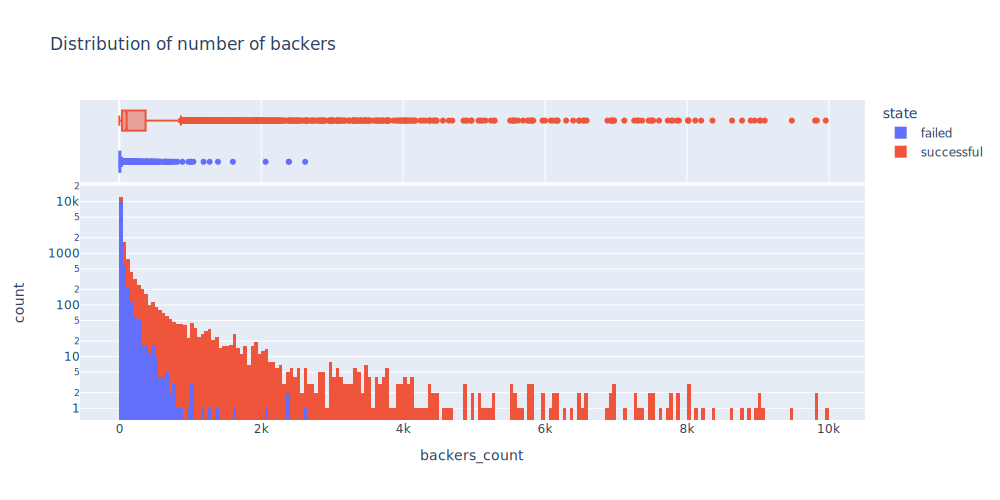

In [8]:
# Plot the distribution of 'backers_count' variable
fig = px.histogram(df[df['backers_count']<=10000], 
                    x='backers_count', 
                    color='state', 
                    log_y=True, 
                    marginal='box', 
                    title='Distribution of number of backers')
fig.show()

The results of the above graph matches the intuition that successful projects have more backers than the failed projects.

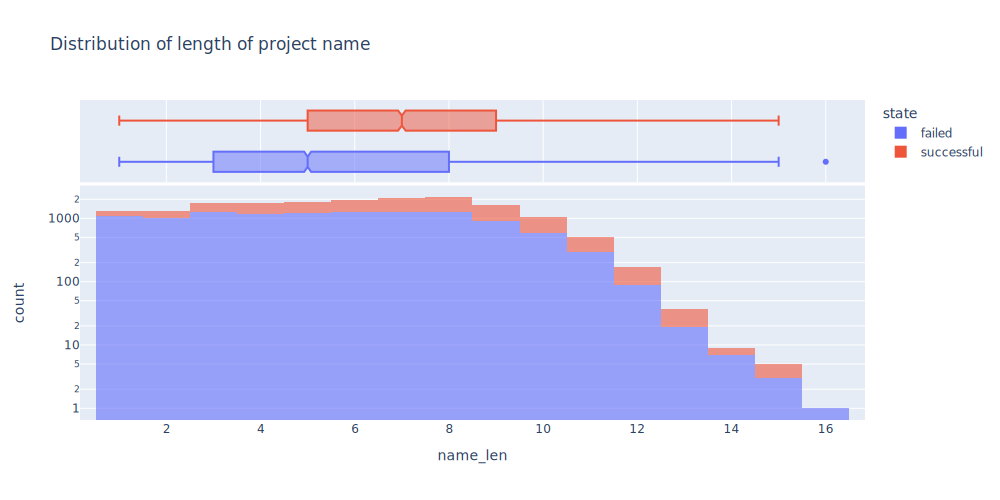

In [9]:
# Plot the distribution of 'name_len' variable
fig = px.histogram(df, 
                    x='name_len', 
                    color='state', 
                    log_y=True, 
                    marginal='box', 
                    opacity=0.6,
                    title='Distribution of length of project name')
fig.show()

The distributions are mostly overlapping for both type of projects but the median of the length of successful project names lies to the right of the length of the failed project names. Thus, it can be inferred that project names with greater length are more likely to be successful.

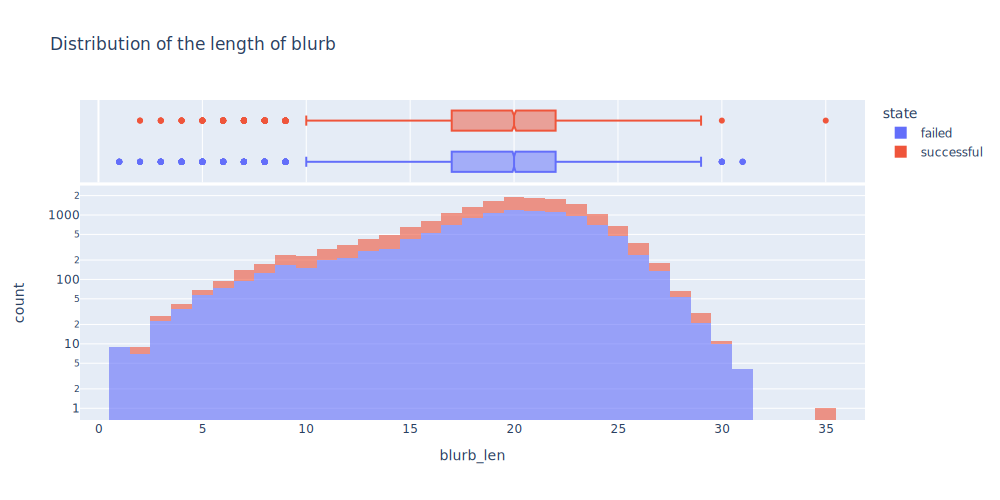

In [10]:
# Plot the distribution of 'blurb_len' variable
fig = px.histogram(df, 
                    x='blurb_len', 
                    color='state', 
                    log_y=True, 
                    marginal='box', 
                    opacity=0.6,
                    title='Distribution of the length of blurb')
fig.show()

### Correlation analysis

Only numerical variables can be used to analyze the correlation with target variable. But since our target variable is also categorical, it is irrelevant to perform correlation analysis with the target variable.

But since numerical variables are available, it is beneficial to spot multicollinearity in the data using correlation.

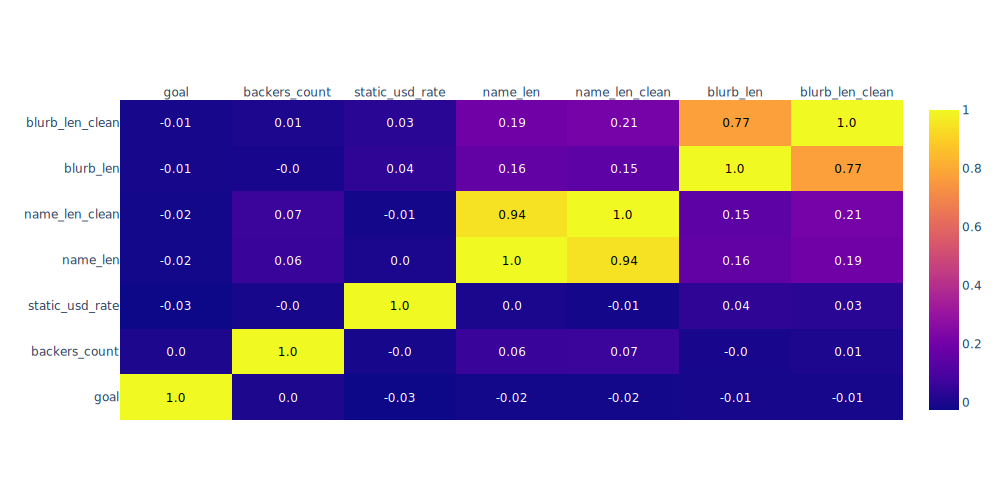

In [11]:
# Calculate the correlation of numeric data
relevant_numeric_columns = ['goal', 'backers_count', 'static_usd_rate', 'name_len', 'name_len_clean', 
                            'blurb_len', 'blurb_len_clean']
df_corr = df[relevant_numeric_columns].corr(method='pearson')
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

# Plot the heatmap of the correlation matrix obtained in the above step
fig = ff.create_annotated_heatmap(
    z=z,
    x=x,
    y=y,
    annotation_text=np.round(z, decimals=2),
    showscale=True
)
fig.show()

The only columns that are highly positively correlated are the length of project names and blurb with their corresponding cleaned columns. For modeling purposes, it will be more appropriate to use the cleaned column lengths. Moreover, there are no columns which are significantly negatively correlated.

## Categorical Variables

Continuing with categorical variables that are *country*, *currency*, *category*, *spotlight*, and *staff_pick*.

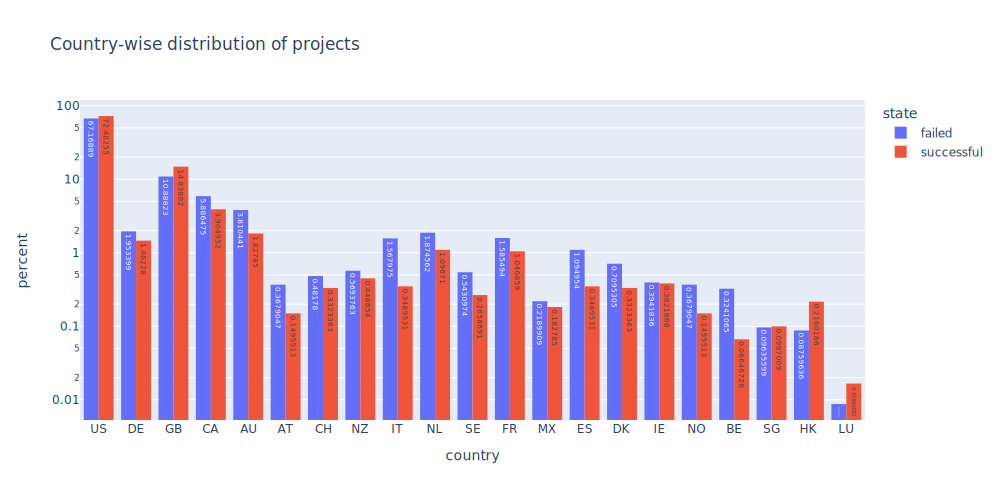

In [12]:
# Plot the distribution of 'country' variable
fig = px.histogram(df, 
                    x='country', 
                    color='state', 
                    text_auto=True, 
                    barmode='group', 
                    histnorm='percent', 
                    log_y=True,
                    title='Country-wise distribution of projects')
fig.show()

The variable *country* does not seem to have any effect on the the target variable. No country is dominant in terms of successful projects.

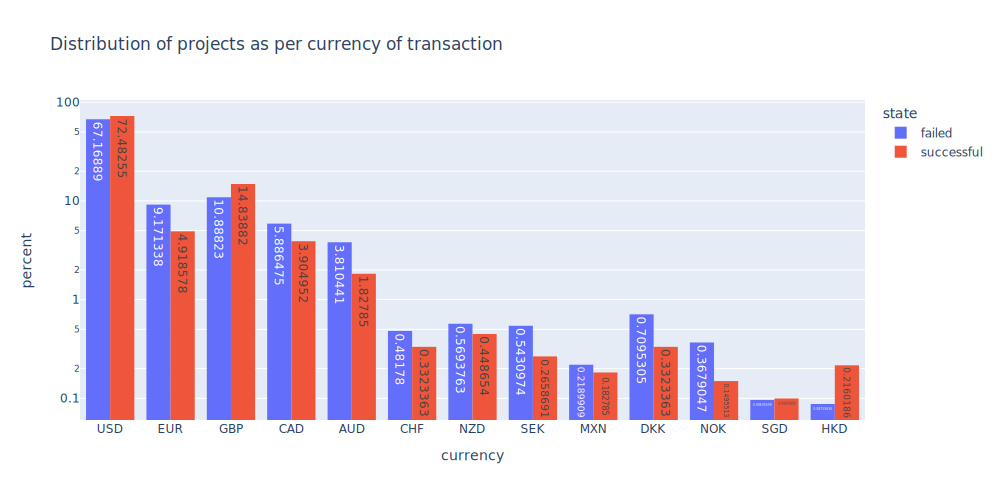

In [13]:
# Plot the distribution of the 'currency' variable
fig = px.histogram(df, 
                    x='currency', 
                    color='state', 
                    text_auto=True, 
                    barmode='group', 
                    histnorm='percent', 
                    log_y=True,
                    title="Distribution of projects as per currency of transaction")
fig.show()

More proportion of projects is successful when transacting in Hong Kong Dollars while the trend is reversed when transacting in Danish Krone and Norwegian Krone. The other currencies do not seem to have any pattern concerning the target variable.

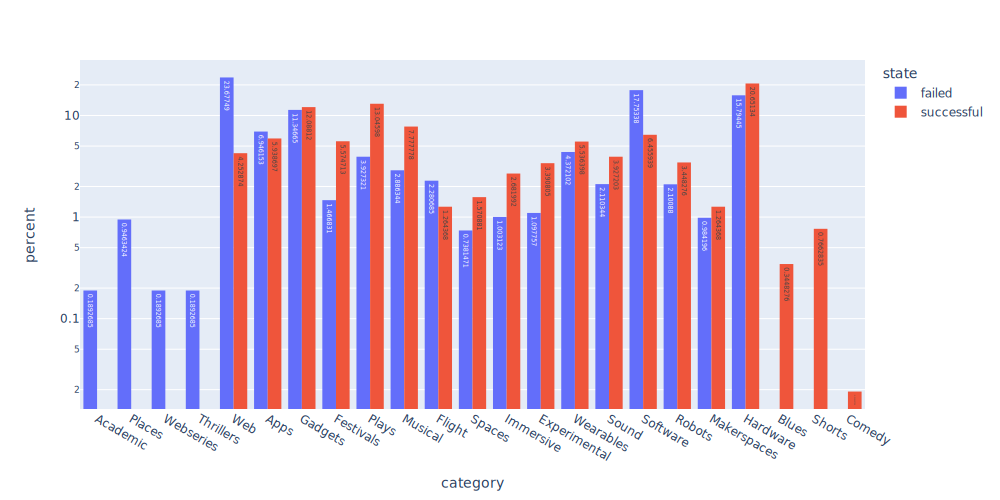

In [14]:
# Plot the distribution of 'category' variable
fig = px.histogram(df, x='category', color='state', text_auto=True, barmode='group', histnorm='percent', log_y=True)
fig.show()

The following observations can be made with the above chart:
1. Categories such as academic, places, webseries, and thrillers have no successful projects.
2. Categories such as blues, shorts and comedy have not failed projects.
3. Web and software categories have a significant proportion of failed projects.
4. Plays and musical categories have a significant proportion of successful projects.

Since this sample of data does not have failed and successful projects for all categories, it will be beneficial to keep only those categories that have representation from both successful and failed projects as bias in the data can be passed on or can even be amplified in the models.

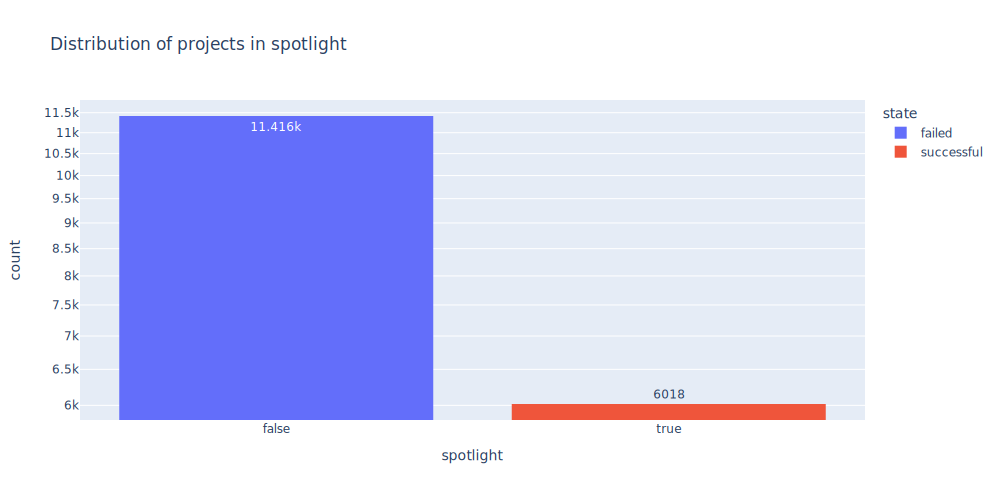

In [15]:
# Plot the distribution of 'spotlight' variable
fig = px.histogram(df, 
                    x='spotlight', 
                    color='state', 
                    text_auto=True, 
                    log_y=True,
                    title='Distribution of projects in spotlight')
fig.show()

It can be seen that the projects which were in spotlight were all successful while those which were not failed. This is a biased variable and hence it is better to drop this variable for creating the model.

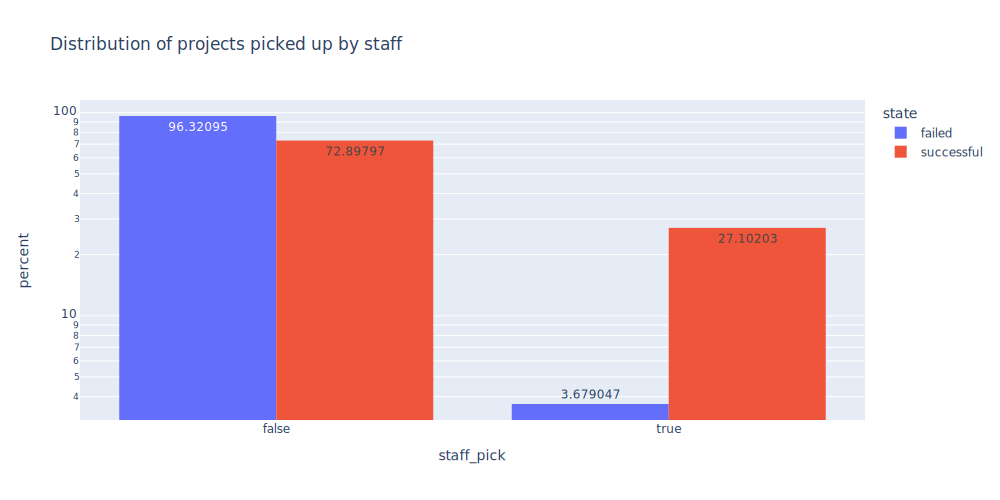

In [16]:
# Plot the distribution of 'staff_pick' variable
fig = px.histogram(df, 
                    x='staff_pick', 
                    color='state', 
                    text_auto=True, 
                    log_y=True,
                    barmode='group',
                    histnorm='percent',
                    title='Distribution of projects picked up by staff')
fig.show()

The chance that a project is successful increases with the possibility of getting picked up by the staff. Very few projects picked up by staff fail.